# Analyzing scaling with mass 
October 13, 2021 
Venkitesh Ayyar

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
%matplotlib widget

In [19]:
# Load dat
df1=pd.DataFrame([])
lst=['tl_0lvl','tl_1lvl','tl_2lvl','tl_3lvl','tl_4lvl']

# fname='../3_complex_scalar_nontelescoping/results_3_scaling_results_gaussian_centered0/ndof_2/scaling_32_width0.01.txt'
fname='../3_complex_scalar_adaptivemgrid/1_mg_regular/stored_data/beta_6.0_quad2/scaling_beta6.0_quad1.txt'
# fname='../3_complex_scalar_adaptivemgrid/1_mg_regular/stored_data/beta_6.0_quad1/scaling_beta6.0_quad1.txt

# a1=np.loadtxt(fname,delimiter='\t')
cols=['L','n_per_level','m','blk_x','blk_y','ndof','levels','conv_iters']
df=pd.read_csv(fname,delimiter='\t',names=cols)
df=df.sort_values(by=['levels','n_per_level','L','m']).reset_index(drop=True)
# df['run_type']='lvl_'+df['levels'].astype(str)+'_blk_'+df['blk_x'].astype(str)
df1=df.copy()
df1

,L,n_per_level,m,blk_x,blk_y,ndof,levels,conv_iters
0,32,3,-0.070,2,2,2,0,8584
1,32,3,-0.068,2,2,2,0,4324
2,32,3,-0.060,2,2,2,0,1448
3,32,3,-0.050,2,2,2,0,792
4,32,3,-0.070,2,2,2,1,2171
5,32,3,-0.068,2,2,2,1,1093
6,32,3,-0.060,2,2,2,1,366
7,32,3,-0.050,2,2,2,1,201
8,32,3,-0.070,2,2,2,2,870
9,32,3,-0.068,2,2,2,2,438


In [20]:
df2=df1[['m','levels','conv_iters',]]
df2.sort_values(by=['m','levels'])

,m,levels,conv_iters
0,-0.070,0,8584
4,-0.070,1,2171
8,-0.070,2,870
12,-0.070,3,395
16,-0.070,4,190
1,-0.068,0,4324
5,-0.068,1,1093
9,-0.068,2,438
13,-0.068,3,199
17,-0.068,4,96


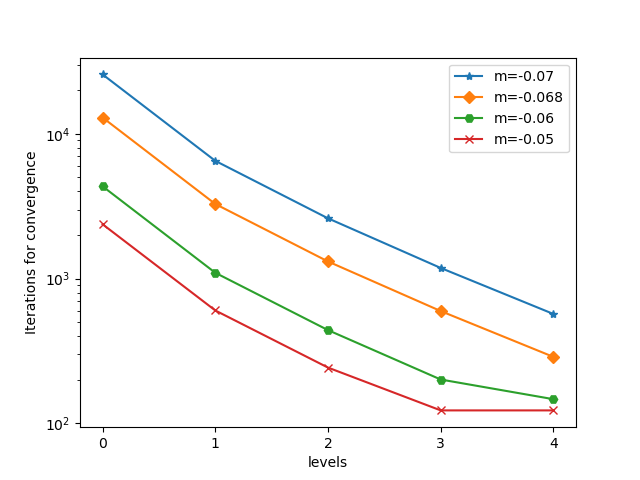

In [21]:
mlist=np.unique(df2.m.values)
# print(mlist)
plt.figure()
for i,marker in zip(mlist,['*','D','H','x','d','p','1','2','h','v']):
    df=df2[df2.m==i][['levels','conv_iters']]
    # display(df)
    plt.plot(df.levels.values,df.conv_iters.values*3,label="m="+str(i),marker=marker)
plt.xticks(df.levels.values)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('levels')
plt.ylabel('Iterations for convergence')
plt.legend()
plt.show()

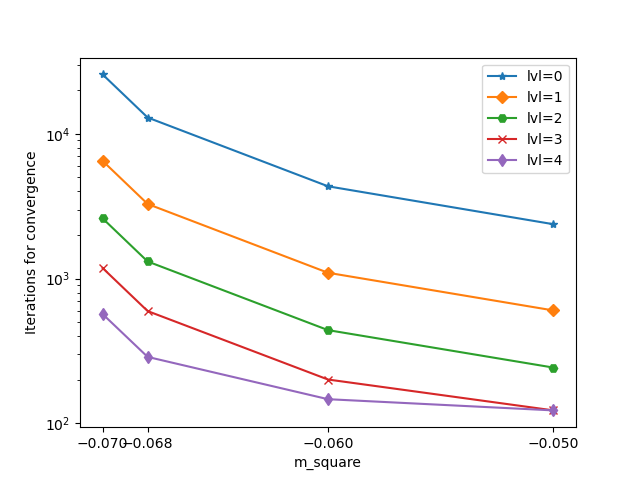

In [22]:
levels_list=np.unique(df2.levels.values)
# print(levels_list)
plt.figure()
for i,marker in zip(levels_list,['*','D','H','x','d','p','1','2','h','v']):
    df=df2[df2.levels==i][['m','conv_iters']]
    # display(df)
    plt.plot(df.m.values,df.conv_iters.values*3,label="lvl="+str(i),marker=marker)
plt.xticks(df.m.values)
plt.yscale('log')
# plt.xscale('log')
plt.xlabel('m_square')
plt.ylabel('Iterations for convergence')
plt.legend()
plt.show()

## Explore variation in heat bath gauge config

In [23]:
fname2='/Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/3_complex_scalar_nontelescoping/gauge_config_files/phase32b3.dat'

a1=np.loadtxt(fname2)
print(a1.shape)

OSError: /Users/vayyar/Desktop/work/PROJECTS/Multigrid/2d_multigrid/code/3_complex_scalar_nontelescoping/gauge_config_files/phase32b3.dat not found.

In [18]:
print(np.max(a1),np.min(a1))
bins=np.arange(-100,100,1)

NameError: name 'a1' is not defined

In [96]:
vals,bin_edges=np.histogram(a1,bins=bins)
bin_centers=(bin_edges+10/2)[:-1]
print(bin_edges,bin_centers)

[-100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73
  -72  -71  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59
  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45
  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31
  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17
  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3
   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   37   38   39
   40   41   42   43   44   45   46   47   48   49   50   51   52   53
   54   55   56   57   58   59   60   61   62   63   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   79   80   81
   82   83   84   85   86   87   88   89   90   91   92   93   94   95
   96 

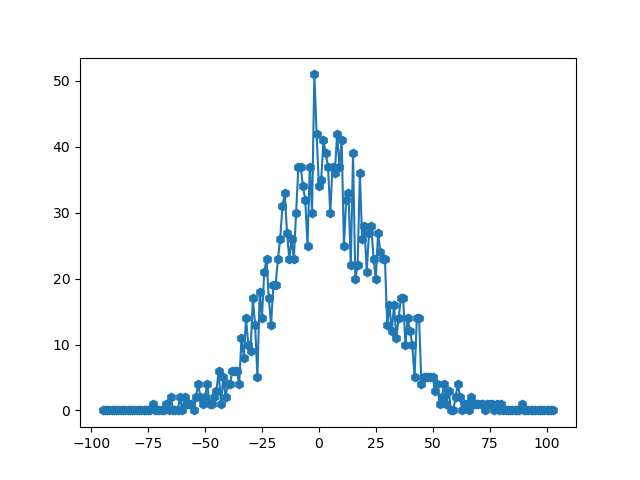

In [97]:
plt.figure()
plt.plot(bin_centers,vals,marker='h')
plt.show()

In [106]:
7402/898963, 8093/898963

(0.008233931763598724, 0.009002595212483717)

In [7]:
4 * 4 * 2 * 4 / 8

16.0

In [6]:
6 * 3 * 6 * 8 /6

144.0

In [8]:
6 * 3 * 1 * 1

18

In [27]:
16 * 8

128